# Diagnosis of Alzheimer Disease using Manifold and Machine Learning Models in Python

### Abdulwahid
### 4/20/2022

## 1. Import Libraries
The given libraries contain functions that are requirement to the project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltfrom
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

## 2. Load Dataset
A path is stored in a variable called **filename**. The columns required are passed to the variable **names** and the dataset is read through the ***read_csv*** function and the ***head*** function is used to read the first five rows.

In [3]:
filename = r'C:\Users\DELL\Desktop\Project Implement\ADNI3_Dataset_01_21_22_SAMPLE2.csv'
names = ['GROUP','ST103CV','ST103SA','ST103TA','ST103TS','ST24CV','ST24SA','ST24TA','ST24TS','ST26CV','ST26SA','ST26TA','ST26TS','ST29SV','ST32CV','ST32SA','ST32TA','ST32TS','ST44CV','ST44SA','ST44TA','ST44TS','ST83CV','ST83SA','ST83TA','ST83TS','ST85CV','ST85SA','ST85TA','ST85TS','ST88SV','ST99CV','ST99SA','ST99TA','ST99TS']
df = pd.read_csv(filename)
dataFrame = df[names]
dataFrame.head()

,GROUP,ST103CV,ST103SA,ST103TA,ST103TS,ST24CV,ST24SA,ST24TA,ST24TS,ST26CV,...,ST83TS,ST85CV,ST85SA,ST85TA,ST85TS,ST88SV,ST99CV,ST99SA,ST99TA,ST99TS
0,CN,1706.0,515.0,2.844,0.841,2651.0,464.0,3.585,0.858,10480.0,...,1.031,8827.0,2422.0,3.129,0.755,3663.4,11682.0,3074.0,3.019,0.719
1,CN,1767.0,518.0,2.941,0.825,1929.0,438.0,3.174,0.942,10719.0,...,0.959,9118.0,2484.0,3.202,0.793,3798.0,11536.0,3173.0,3.030,0.667
2,AD,1492.0,668.0,1.981,0.750,1471.0,387.0,2.188,1.140,NaN,...,1.069,NaN,NaN,NaN,NaN,3106.7,NaN,NaN,NaN,NaN
3,AD,1222.0,687.0,1.677,0.616,1653.0,601.0,1.946,0.822,NaN,...,1.197,NaN,NaN,NaN,NaN,3561.1,NaN,NaN,NaN,NaN
4,AD,1109.0,559.0,1.855,0.540,1909.0,538.0,2.323,0.917,NaN,...,0.730,NaN,NaN,NaN,NaN,2370.9,NaN,NaN,NaN,NaN


## 3. Data Preprocessing
### Rename Columns
The columns are given names which are simple to understand compared to alphanumeric terms. The ***head*** function is used to verify the changes

In [4]:
dataFrame.columns = ['GROUP','V.RightParahippocampal','SA.RightParahippocampal','T.RightParahippocampal','TSD.RightParahippocampal','V.LeftEntorhinal','SA.LeftEntorhinal','T.LeftEntorhinal','TSD.LeftEntorhinal','V.LeftFusiform','SA.LeftFusiform','T.LeftFusiform','TSD.LeftFusiform','V.LeftHippocampus','V.LeftInferiorTemporal','SA.LeftInferiorTemporal','T.LeftInferiorTemporal','TSD.LeftInferiorTemporal','V.LeftParahippocampal','SA.LeftParahippocampal','T.LeftParahippocampal','TSD.LeftParahippocampal','V.RightEntorhinal','SA.RightEntorhinal','T.RightEntorhinal','TSD.RightEntorhinal','V.RightFusiform','SA.RightFusiform','T.RightFusiform','TSD.RightFusiform','V.RightHippocampus','V.RightMiddleTemporal','SA.RightMiddleTemporal','T.RightMiddleTemporal','TSD.RightMiddleTemporal']
dataFrame.head()

,GROUP,V.RightParahippocampal,SA.RightParahippocampal,T.RightParahippocampal,TSD.RightParahippocampal,V.LeftEntorhinal,SA.LeftEntorhinal,T.LeftEntorhinal,TSD.LeftEntorhinal,V.LeftFusiform,...,TSD.RightEntorhinal,V.RightFusiform,SA.RightFusiform,T.RightFusiform,TSD.RightFusiform,V.RightHippocampus,V.RightMiddleTemporal,SA.RightMiddleTemporal,T.RightMiddleTemporal,TSD.RightMiddleTemporal
0,CN,1706.0,515.0,2.844,0.841,2651.0,464.0,3.585,0.858,10480.0,...,1.031,8827.0,2422.0,3.129,0.755,3663.4,11682.0,3074.0,3.019,0.719
1,CN,1767.0,518.0,2.941,0.825,1929.0,438.0,3.174,0.942,10719.0,...,0.959,9118.0,2484.0,3.202,0.793,3798.0,11536.0,3173.0,3.030,0.667
2,AD,1492.0,668.0,1.981,0.750,1471.0,387.0,2.188,1.140,NaN,...,1.069,NaN,NaN,NaN,NaN,3106.7,NaN,NaN,NaN,NaN
3,AD,1222.0,687.0,1.677,0.616,1653.0,601.0,1.946,0.822,NaN,...,1.197,NaN,NaN,NaN,NaN,3561.1,NaN,NaN,NaN,NaN
4,AD,1109.0,559.0,1.855,0.540,1909.0,538.0,2.323,0.917,NaN,...,0.730,NaN,NaN,NaN,NaN,2370.9,NaN,NaN,NaN,NaN


### Sum of Null Values
The ***isnull*** function detects the null values while the ***sum*** function adds up all null values corresponding to a column.

In [5]:
dataFrame.isnull().sum()

GROUP                        0
V.RightParahippocampal       5
SA.RightParahippocampal      5
T.RightParahippocampal       5
TSD.RightParahippocampal     5
V.LeftEntorhinal             5
SA.LeftEntorhinal            5
T.LeftEntorhinal             5
TSD.LeftEntorhinal           5
V.LeftFusiform              43
SA.LeftFusiform             43
T.LeftFusiform              43
TSD.LeftFusiform            43
V.LeftHippocampus            3
V.LeftInferiorTemporal      43
SA.LeftInferiorTemporal     43
T.LeftInferiorTemporal      43
TSD.LeftInferiorTemporal    43
V.LeftParahippocampal        5
SA.LeftParahippocampal       5
T.LeftParahippocampal        5
TSD.LeftParahippocampal      5
V.RightEntorhinal            5
SA.RightEntorhinal           5
T.RightEntorhinal            5
TSD.RightEntorhinal          5
V.RightFusiform             43
SA.RightFusiform            43
T.RightFusiform             43
TSD.RightFusiform           43
V.RightHippocampus           3
V.RightMiddleTemporal       43
SA.Right

### Dataset shape
The function ***shape*** is used to check the number of rows and columns in a dataset. This is the first check.

In [6]:
dataFrame.shape

(775, 35)

### Delete Missing Values
The ***dropna*** function is used to delete rows with missing values. Since health related data is concerned, deleting missing values is the best option.

In [7]:
dataFrame=dataFrame.dropna()

### Dataset shape
The function ***shape*** is used to check the number of rows and columns in a dataset. This is the second check.

In [8]:
dataFrame.shape

(732, 35)

## 4. Exploratory Data Analysis
### Bar chart
The number of patients who are Normal and those who have Alzhimer's Disease. Seaborn library is one of the most used library for creating visualizations.

<AxesSubplot:xlabel='GROUP', ylabel='count'>

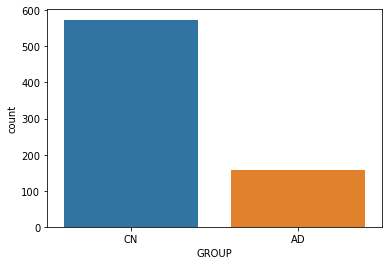

In [9]:
import warnings
warnings.filterwarnings('ignore')
dataFrame['GROUP'].value_counts()
import seaborn as sns
sns.countplot(dataFrame['GROUP'],label='count')

### Violin plot
This is similar to density diagrm showing distribution of categorical data throughout the features. Uneven distiribution can be observed with such visual.

In [10]:
y = dataFrame.GROUP
list = ['GROUP']
X = dataFrame.drop(list,axis = 1)

In [11]:
data_dia = y
data = X
data_std = (data - data.mean()) / (data.std()) # standardization

In [14]:
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,0:31]],axis=1)
data = pd.melt(data,id_vars="GROUP",
 var_name="features",
 value_name='value')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'V.RightParahippocampal'),
  Text(1, 0, 'SA.RightParahippocampal'),
  Text(2, 0, 'T.RightParahippocampal'),
  Text(3, 0, 'TSD.RightParahippocampal'),
  Text(4, 0, 'V.LeftEntorhinal'),
  Text(5, 0, 'SA.LeftEntorhinal'),
  Text(6, 0, 'T.LeftEntorhinal'),
  Text(7, 0, 'TSD.LeftEntorhinal'),
  Text(8, 0, 'V.LeftFusiform'),
  Text(9, 0, 'SA.LeftFusiform'),
  Text(10, 0, 'T.LeftFusiform'),
  Text(11, 0, 'TSD.LeftFusiform'),
  Text(12, 0, 'V.LeftHippocampus'),
  Text(13, 0, 'V.LeftInferiorTemporal'),
  Text(14, 0, 'SA.LeftInferiorTemporal'),
  Text(15, 0, 'T.LeftInferiorTemporal'),
  Text(16, 0, 'TSD.LeftInferiorTemporal'),
  Text(17, 0, 'V.LeftParahippocampal'),
  Text(18, 0, 'SA.LeftParahippocampal'),
  Text(19, 0, 'T.LeftParahippocampal'),
  Text(20, 0, 'TSD.LeftParahippocampal'),
  Text(21, 0, 'V.RightEntorhinal'),
  Text(22, 0, 'SA.Rig

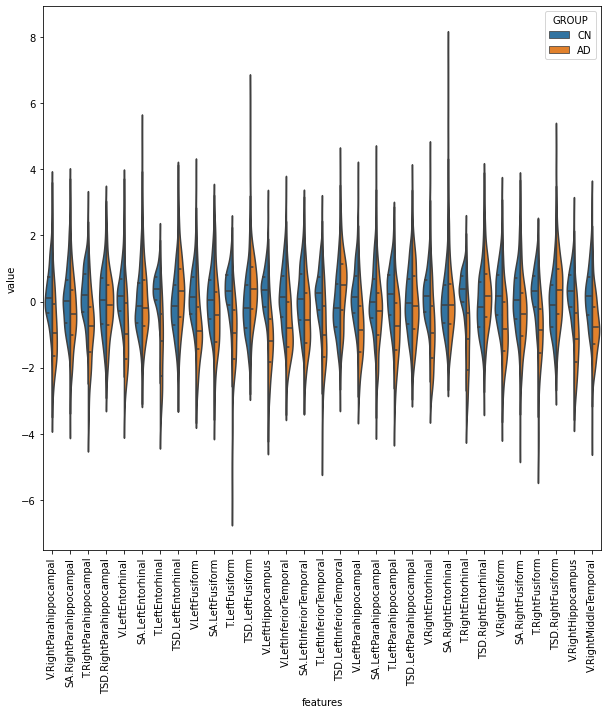

In [15]:
# make a violin plot
pltfrom.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="GROUP", data=data,split=True, inner="quart")
pltfrom.xticks(rotation=90)

### Corrorelation Map
This visula shows how features are correlated to each other, the features with highest correlation amongst each other can be reduced for model effficiency.

<AxesSubplot:>

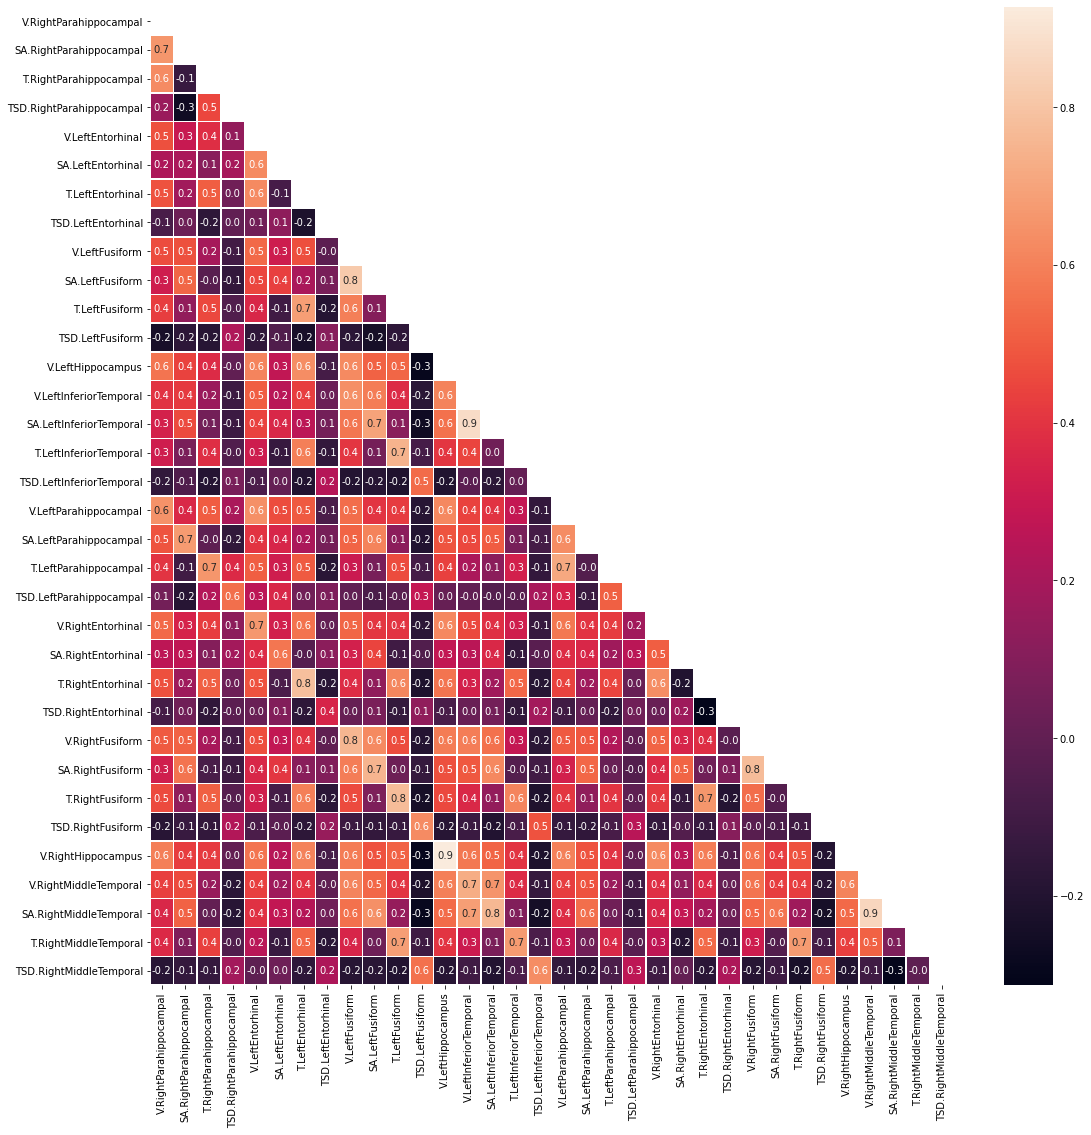

In [16]:
#correlation map
f,ax = pltfrom.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

### Box plot
The two boxplots show range of  Left hippocampus and Right hippocampus values corresponding to Normal and AD patients.

Text(0.5, 1.0, 'Graph of Left Hippocampus vs diagnosis of AD')

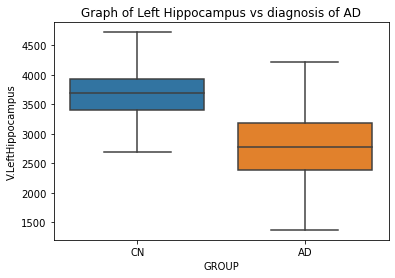

In [17]:
# create boxplots for L.Hippo vs diagnosis of AD
plot = sns.boxplot(x='GROUP', y='V.LeftHippocampus', data=dataFrame, showfliers=False)
plot.set_title("Graph of Left Hippocampus vs diagnosis of AD")

Text(0.5, 1.0, 'Graph of Right Hippocampus vs diagnosis of AD')

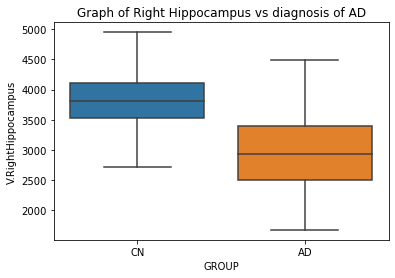

In [18]:
# create boxplots for R.Hippo vs diagnosis of AD
plot = sns.boxplot(x='GROUP', y='V.RightHippocampus', data=dataFrame, showfliers=False)
plot.set_title("Graph of Right Hippocampus vs diagnosis of AD")

## 5. Data Transformation
### Label Encoding
Further more ***Label encoding*** is applied on the Y variable to convert **categorical** data into **numerical** data.

In [19]:
Y=dataFrame.iloc[:,0]
X=dataFrame.iloc[:,1:35]
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(X)
print(Y)

     V.RightParahippocampal  SA.RightParahippocampal  T.RightParahippocampal  \
0                    1706.0                    515.0                   2.844   
1                    1767.0                    518.0                   2.941   
6                    2176.0                    672.0                   2.720   
7                    1738.0                    720.0                   2.262   
8                    1831.0                    636.0                   2.590   
..                      ...                      ...                     ...   
769                  1846.0                    656.0                   2.589   
771                  1642.0                    553.0                   2.591   
772                  1820.0                    623.0                   2.633   
773                  1622.0                    579.0                   2.351   
774                  1419.0                    565.0                   2.260   

     TSD.RightParahippocampal  V.LeftEn

### Dimensionality Reduction (PCA)
High dimensional data to low dimensional data in a high dimensional space. The features are reduced from 35 to 2 features preserving the important data from the old features. This helps improve the model efficiency.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [21]:
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.69187663, 0.1129062 ])

### Data Split
The data is split into training and testing set. The training set is used to train the model while the testing set is used to examine the model for efficiency.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.2,
    random_state=0)
X_train.shape, X_test.shape

((585, 34), (147, 34))

### Standard scaling
ALl high range data is transformed to low range for smooth analysis and pattern finding.

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

## 6. Feature Verification
The features are checked for importance and contribution the diagnosis.
### Regression Analysis (Ridge Model)
Ridge model is used to determine if the features selected contribute to the diagnosis and the results show that all selected features are important.

In [24]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2',solver='liblinear'))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, solver='liblinear'))

In [25]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 34
features with coefficients shrank to zero: 0


In [26]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')

## 7. Build Classification Models
Models are built to classify given data. This is done by fitting training set to the model.
### SVM Model (Support Vector Machine)
SVM model is classifying the given data along with testing the model to for evaluation.

In [35]:
from sklearn.svm import SVC  
clf = SVC(kernel='rbf', C=1E10)
# fitting x samples and y classes 
clf.fit(X_train, y_train.ravel())

SVC(C=10000000000.0)

In [36]:
from sklearn.metrics import accuracy_score
y_pred_clf_train = clf.predict(X_train)
accuracy_clf_train = accuracy_score(y_train, y_pred_clf_train)
print("Training set: ", accuracy_clf_train)

y_pred_clf_test = clf.predict(X_test)
accuracy_clf_test = accuracy_score(y_test, y_pred_clf_test)
print("Test set: ", accuracy_clf_test)

Training set:  1.0
Test set:  0.9455782312925171


### Classification Report
This report shows different parameters of the model including accuracy, precision, f1-score etc. These are also used to evaluate the perfomance of the model

In [62]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred_clf_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.97      0.96      0.97       120

    accuracy                           0.95       147
   macro avg       0.90      0.92      0.91       147
weighted avg       0.95      0.95      0.95       147



### Confusion Matrix
This is used to display how the testing set was correctly or incorrectly classified

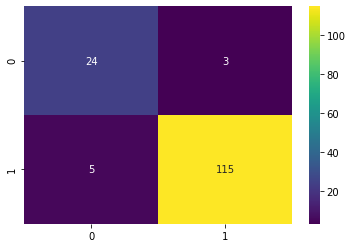

In [63]:
from sklearn.metrics import confusion_matrix
cm=sns.heatmap(confusion_matrix(y_test, y_pred_clf_test), annot=True, cmap = 'viridis', fmt='.0f')
pltfrom.show()

### LR Model (Logistic Regression)

In [39]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

In [40]:
classifier_lr = classifier_lr.fit(X_train, y_train.ravel())

In [41]:
from sklearn.metrics import accuracy_score

y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.9076923076923077
Test set:  0.9183673469387755


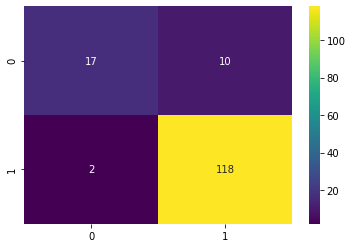

In [42]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
pltfrom.show()

### GaussianNB Model (Naive Bayes)

In [43]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())

GaussianNB()

In [44]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.8991452991452992
Test set:  0.9115646258503401


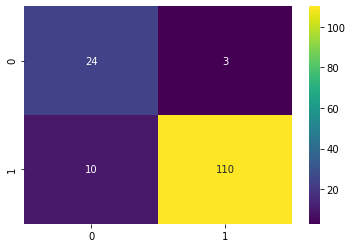

In [45]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
pltfrom.show()

### DT Model (Decision Tree)

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

In [47]:
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [48]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  1.0
Test set:  0.891156462585034


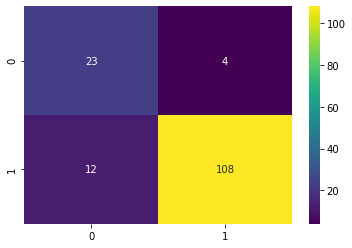

In [49]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
pltfrom.show()

### KNN Model K Nearest Neighbors)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()

In [51]:
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [52]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  0.9094017094017094
Test set:  0.8843537414965986


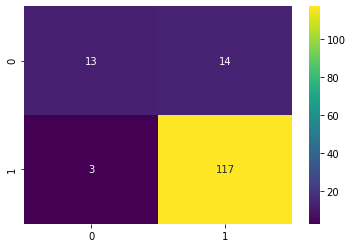

In [53]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
pltfrom.show()

## 8. Comparitive Analysis of ML Models
The models are compared for the training and testing accuracy. SVM has the highest training and testing accuracy.

In [54]:
models = [('SVM (Kernel)', accuracy_clf_train, accuracy_clf_test),
          ('Logistic Regression', accuracy_lr_train, accuracy_lr_test),
          ('Naive Bayes', accuracy_nb_train, accuracy_nb_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
         ]

In [55]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,SVM (Kernel),1.000000,0.945578
1,Logistic Regression,0.907692,0.918367
2,Naive Bayes,0.899145,0.911565
3,KNN,0.909402,0.884354
4,Decision Tree Classification,1.000000,0.891156


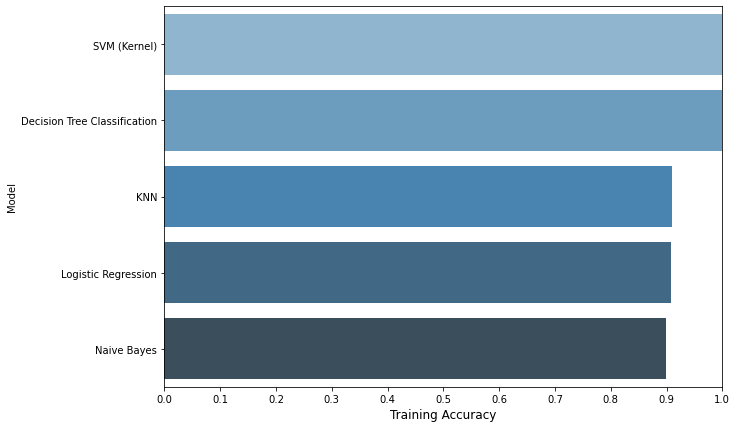

In [56]:
predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

f, axes = pltfrom.subplots(1,figsize=(10,7))

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes)
#axes[0].set(xlabel='Region', ylabel='Charges')
axes.set_xlabel('Training Accuracy', size=12)
axes.set_ylabel('Model')
axes.set_xlim(0,1.0)
axes.set_xticks(np.arange(0, 1.1, 0.1))

pltfrom.show()

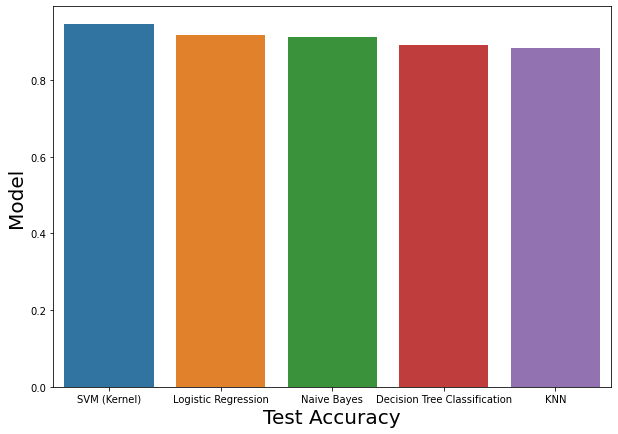

In [57]:
predict.sort_values(by=(['Test Accuracy']), ascending=False, inplace=True)

f, axe = pltfrom.subplots(1,1, figsize=(10,7))
sns.barplot(x = predict['Model'], y=predict['Test Accuracy'], ax = axe)
axe.set_xlabel('Test Accuracy', size=20)
axe.set_ylabel('Model', size=20)

pltfrom.show()

### Confusion matrix (Percentage data)

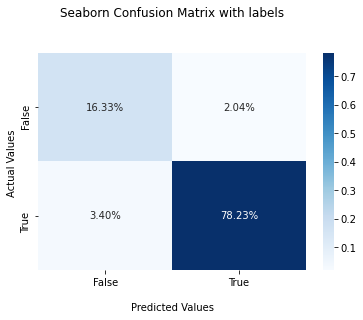

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred_clf_test)
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
pltfrom.show()

### ROC Analysis

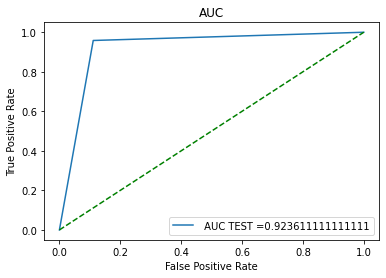

In [68]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_clf_test)

pltfrom.grid()

pltfrom.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
pltfrom.plot([0,1],[0,1],'g--')
pltfrom.legend()
pltfrom.xlabel("False Positive Rate")
pltfrom.ylabel("True Positive Rate")
pltfrom.title("AUC")
pltfrom.grid(color='black', linestyle='-', linewidth=0.5)
pltfrom.show()